<a href="https://colab.research.google.com/github/wallisonferreira/machine-learning-pavic/blob/main/PAVIC_ML_01_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

In [ ]:
#Algoritimo adaline

# Inicializar o 'w' e o 'b'
# Para cada amostra
  # calcular o y_pred = f(E xi*wi + b)onde f é  função de ativação step, para regressão trocamos para linear
  # calcular o erro erro = y - y_pred
  # atualizar os pesos wi = wi + lambda * erro * xi
  # atualizar o bias bi = bi + lambda*erro
# repetir até encontrar o menor erro

## Regressão

In [20]:
df = pd.read_csv('/content/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [21]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [22]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [23]:
x = x.reshape(-1, 3)

print(x.shape, y.shape)

(25, 3) (25,)


In [19]:
#PUT YOUR CODE HERE
D = x.shape[1]
w = 2 * np.random.random(D)-1
b = 2 * np.random.random()-1

learning_rate = 1e-3

for step in range(2000):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w) + b
        error = y_n - y_pred
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        cost += error ** 2

    if step % 200 == 0:
        print("step {0}: {1}".format(step, cost))
print('w: ', w)
print('b: ', b)

step 0: 646600.972608327
step 200: 1169.8872854537017
step 400: 520.9580220709163
step 600: 411.579762349554
step 800: 336.8661074964189
step 1000: 283.80038585988973
step 1200: 245.9319868741145
step 1400: 218.7798546890908
step 1600: 199.21006828222076
step 1800: 185.025687261757
w:  [13.75755572 13.86295947 21.61990651]
b:  149.98011653486887


In [9]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


# Classificação

## Porta OR ou AND

In [24]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


In [29]:
#PUT YOUR CODE HERE
D = x.shape[1]
w = 2 * np.random.random(D)-1
b = 2 * np.random.random()-1

learning_rate = 1e-3

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        #y_pred = np.where(y_pred > 0, 1, 0) # a função de ativação já é linear f(x) = x
        error = y_n - y_pred
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        cost += cost ** 2
    if step%200 == 0:
        print("step {0}: {1}".format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, w) + b))

step 0: 0
w:  [0.02458846 0.23310266]
b:  -0.39207942515442473
y_pred: [ 1.20469996  0.28499978 -0.42222219  1.45612775  1.07120236 -0.30260564
  0.77830649  0.29506625  0.5304082   0.50049323  0.09355946  0.77769704
 -0.01485564  0.09425106 -0.07071401 -0.13239405  0.83872671  1.08291122
  0.19497905  0.96375326 -0.12010878  0.99255564  0.63913456  0.66962812
  0.15926093  0.77752157 -0.01553222  0.96658686  0.9391938   0.74746375
  0.59575529  0.68621219 -0.38144613  0.09437225 -0.02169472  1.30632609
  1.00085056  0.56510532  0.39970473  0.10438264 -0.13607573 -0.29084615
 -0.04668092  0.94879555 -0.17753989  0.72671085  0.74029298  0.88278254
  0.01827452  1.16141138  0.85910218  0.01777626 -0.45729722 -0.19092406
  0.21457879  1.15430501  0.83421287  1.36910914  0.69913001  1.11095677
  0.75343117  0.60353166  0.66243691  0.82616657  0.54072803 -0.50863565
  0.0263966   0.86017393 -0.0657727   0.91315464 -0.23761033  0.02647363
  1.23739297 -0.10466951  0.10285449  0.77935156 -0.1

In [ ]:
#PUT YOUR CODE HERE

## Exercício de Classificação


(100, 2) (100,)


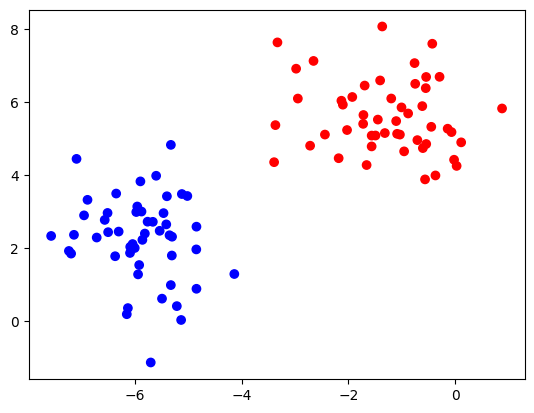

In [31]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [32]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh < 0.5, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [33]:
#PUT YOUR CODE HERE
D = x.shape[1]
w = 2 * np.random.random(D)-1
b = 2 * np.random.random()-1

learning_rate = 1e-3

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        #y_pred = np.where(y_pred > 0, 1, 0) # a função de ativação já é linear f(x) = x
        error = y_n - y_pred
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        cost += cost ** 2
    if step%200 == 0:
        print("step {0}: {1}".format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, w) + b))

step 0: 0
step 200: 0
step 400: 0
step 600: 0
step 800: 0
step 1000: 0
w:  [0.13947153 0.08181954]
b:  0.6712842349281214
y_pred: [ 0.88439069  0.25217461 -0.02179977  1.14112669  0.96296558  0.06831365
  0.93967883  0.24230237  0.94667221  0.91068163  0.20736158  0.64106665
 -0.13101703  0.13358872 -0.00162625 -0.07131771  1.04468184  1.11687106
  0.09782841  0.86821005 -0.18035861  0.90498976  1.03051181  0.91872217
  0.08287569  0.90936137  0.03651041  1.06749345  0.86312901  0.97854444
  0.73231239  0.84491594 -0.04383097 -0.0172616  -0.07768012  0.83163494
  1.00340936  0.79006874  0.21598627  0.10419627 -0.18058048  0.00961806
  0.00159978  1.01032277 -0.0282282   0.99295073  0.74937075  0.893787
  0.12109129  1.17823082  0.96577277 -0.03580417 -0.15411615  0.20033863
 -0.01729756  1.14282073  1.08325466  1.23329288  0.97503605  1.01481468
  1.08806118  0.32363375  0.68572262  0.87322081  0.55471911 -0.04160144
 -0.00696578  0.9211899  -0.0109724   1.01403813 -0.05203843  0.11780

In [ ]:
#PUT YOUR CODE HERE

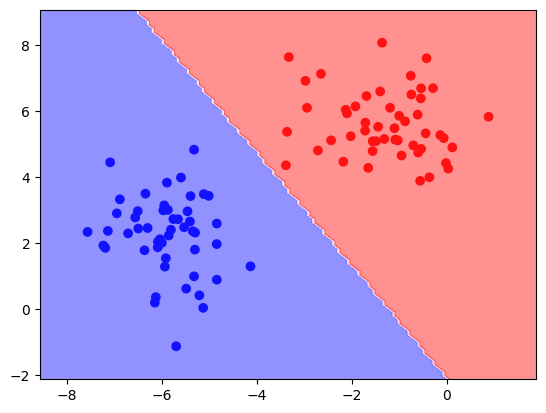

In [34]:
plot_linear_classifier(x, y, w, b)

# Perceptron Regressão linear

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__.

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [ ]:
df = pd.read_csv('/content/medidas.csv')
print(df.shape)
df.head(10)

In [ ]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
print(x.shape, y.shape)

In [ ]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

In [ ]:
#PUT YOUR CODE HERE

In [ ]:
# os dados nao estao normalizados peso em kg e altura em m
# vamos normalizar
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

In [ ]:
#PUT YOUR CODE HERE

In [ ]:
def plot_line(w, b):
    plt.figure(0, figsize=(8,8))
    plt.subplot(1,1,1)
    plt.scatter(x, y)
    y_pred = x*w + b
    plt.plot(x, y_pred, c='red')
    plt.xlim(140, 210)
    plt.ylim(40, 120)

    plt.subplot(1,1,1)
    x_ = np.array([0, x.max()])
    y_ = x_*w + b
    plt.scatter(x, y)
    plt.plot(x_, y_, c='red')
    plt.xlim(0, 1)
    plt.ylim(-160, 120)

    plt.show()

In [ ]:
plot_line(w, b)

## Exercício

In [ ]:
df = pd.read_csv('/content/notas.csv')

print(df.shape)
df.head(10)

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [ ]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [ ]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

In [ ]:
#PUT YOUR CODE HERE